In [168]:
!pip install -q --upgrade pandas
!pip install -q --upgrade pandas-datareader

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns
import pandas_datareader as pdr
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

# Fetch the closing prices for the required stocks

In [94]:
def get_stock_data(tickers,start_date,end_date):
  """
  Function to fetch the closing prices for the required stocks in a stipulated time frame from Yahoo Finance
  """
  stock_data = pdr.DataReader(tickers, data_source='yahoo', start= start_date,end=end_date)
  stock_data = stock_data["Close"]
  return stock_data

In [170]:
tickers = ["AAPL","PFE","ED","XOM","AWK",'SPY']
start_date = datetime(2020,11,16)
end_date = datetime(2021,11,12)

In [171]:
stock_data = get_stock_data(tickers,start_date,end_date)
stock_data.head()

Symbols,AAPL,PFE,ED,XOM,AWK,SPY
Date,,,,,,
2020-11-16,120.300003,35.417458,82.709999,38.160000,165.550003,362.570007
2020-11-17,119.389999,36.040001,79.250000,38.669998,159.289993,360.619995
2020-11-18,118.029999,36.320000,77.690002,37.209999,156.190002,356.279999
2020-11-19,118.639999,36.189999,77.099998,37.400002,156.649994,357.779999
2020-11-20,117.339996,36.700001,77.389999,36.939999,157.710007,355.329987


# Compute Average Daily Returns

In [172]:
def compute_daily_returns(stock_data:pd.core.frame.DataFrame)->pd.core.frame.DataFrame:
  """
  Function to compute the daily returns for a given dataframe of closing price of stock data
  """
  return stock_data.pct_change()

In [173]:
daily_returns = compute_daily_returns(stock_data)
daily_returns

Symbols,AAPL,PFE,ED,XOM,AWK,SPY
Date,,,,,,
2020-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-17,-0.007564,0.017577,-0.041833,0.013365,-0.037813,-0.005378
2020-11-18,-0.011391,0.007769,-0.019685,-0.037755,-0.019461,-0.012035
2020-11-19,0.005168,-0.003579,-0.007594,0.005106,0.002945,0.004210
2020-11-20,-0.010958,0.014092,0.003761,-0.012300,0.006767,-0.006848
...,...,...,...,...,...,...
2021-11-08,-0.005553,-0.005760,-0.014832,0.010766,-0.003831,0.000854
2021-11-09,0.002459,-0.021312,0.010123,0.009738,0.003018,-0.003305
2021-11-10,-0.019163,0.036364,0.001670,-0.032700,0.014630,-0.008045


In [174]:
daily_returns.mean()

Symbols
AAPL    0.001004
PFE     0.001471
ED     -0.000216
XOM     0.002262
AWK     0.000212
SPY     0.001045
dtype: float64

# Compute Log Returns

In [175]:
def compute_log_returns(stock_data:pd.core.frame.DataFrame)->pd.core.frame.DataFrame:
  """
  Function to compute the log of daily returns for a given dataframe of closing price of stock data
  """
  return stock_data.pct_change().apply(lambda x: np.log(1+x))

In [176]:
log_returns = compute_log_returns(stock_data)
log_returns

Symbols,AAPL,PFE,ED,XOM,AWK,SPY
Date,,,,,,
2020-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-17,-0.007593,0.017425,-0.042733,0.013276,-0.038547,-0.005393
2020-11-18,-0.011457,0.007739,-0.019881,-0.038487,-0.019653,-0.012108
2020-11-19,0.005155,-0.003586,-0.007623,0.005093,0.002941,0.004201
2020-11-20,-0.011018,0.013994,0.003754,-0.012376,0.006744,-0.006871
...,...,...,...,...,...,...
2021-11-08,-0.005568,-0.005777,-0.014943,0.010708,-0.003839,0.000853
2021-11-09,0.002456,-0.021542,0.010072,0.009691,0.003013,-0.003311
2021-11-10,-0.019349,0.035718,0.001669,-0.033247,0.014524,-0.008077


# Compute Annual Volatility

In [177]:
annual_volatility = daily_returns.std().apply(lambda x: x*np.sqrt(252))
annual_volatility

Symbols
AAPL    0.248029
PFE     0.240691
ED      0.177816
XOM     0.321204
AWK     0.211117
SPY     0.122068
dtype: float64

# Corelation




In [178]:
daily_returns.corr()

Symbols,AAPL,PFE,ED,XOM,AWK,SPY
Symbols,,,,,,
AAPL,1.000000,0.121356,0.079275,0.021223,0.302499,0.679478
PFE,0.121356,1.000000,0.173120,0.082291,0.151187,0.158349
ED,0.079275,0.173120,1.000000,-0.037842,0.525860,0.142769
XOM,0.021223,0.082291,-0.037842,1.000000,-0.120329,0.425514
AWK,0.302499,0.151187,0.525860,-0.120329,1.000000,0.316650
SPY,0.679478,0.158349,0.142769,0.425514,0.316650,1.000000


# Co-variance

In [179]:
daily_returns.cov()

Symbols,AAPL,PFE,ED,XOM,AWK,SPY
Symbols,,,,,,
AAPL,0.000244,0.000029,0.000014,0.000007,0.000063,0.000082
PFE,0.000029,0.000230,0.000029,0.000025,0.000030,0.000018
ED,0.000014,0.000029,0.000125,-0.000009,0.000078,0.000012
XOM,0.000007,0.000025,-0.000009,0.000409,-0.000032,0.000066
AWK,0.000063,0.000030,0.000078,-0.000032,0.000177,0.000032
SPY,0.000082,0.000018,0.000012,0.000066,0.000032,0.000059


# Alpha and Beta Calculation

In [187]:
def get_alpha_beta(ticker,start_date = datetime(2016,11,12),end_date = datetime(2021,11,12)):
  """
  Function to return the alpha and beta values for a given stock
  """
  stocks = [ticker,'SPY']
  stock_df = pdr.get_data_yahoo(stocks, start = start_date, end=end_date)
  stock_df = stock_df["Close"]
  log_returns = np.log(stock_df/stock_df.shift())

  X = log_returns['SPY'].iloc[1:].to_numpy().reshape(-1, 1)
  Y = log_returns[ticker].iloc[1:].to_numpy().reshape(-1, 1)
  lin_regr = LinearRegression()
  lin_regr.fit(X, Y)
  beta = lin_regr.coef_[0, 0]
  alpha = lin_regr.intercept_[0]
  return alpha,beta

In [188]:
for s in tickers[:-1]:
  alpha,beta = get_alpha_beta(s,start_date = datetime(2020,11,16),end_date = datetime(2021,11,12))
  print(f"For {s}: Alpha = {alpha}, Beta = {beta}")

For AAPL: Alpha = -0.0005164645875209478, Beta = 1.3784408056826578
For PFE: Alpha = 0.001040226694156326, Beta = 0.31277129588681746
For ED: Alpha = -0.0004902374186578051, Beta = 0.20880020687157125
For XOM: Alpha = 0.0009236760181296868, Beta = 1.1169544092524628
For AWK: Alpha = -0.0004360843025888588, Beta = 0.551420836623217


# Plot Efficient Frontiers of Portfolios

In [169]:
def efficient_frontier(tickers,runs=10000):
  """
  Function to return the expected returns, expected volatilities and corresponding sharpe ratios for a given portfolio using Monte Carlo Simulation
  """

  # Fetch the closing prices for the given data and compute the corresponding log returns
  stock_df = get_stock_data(tickers,start_date = datetime(2020,11,16), end_date = datetime(2021,11,12))
  log_return_df = compute_log_returns(stock_df)
  
  # Create empty arrays initialized with zeros for weights, expected returns and expected volatility
  weights = np.zeros((runs,len(tickers)))
  expected_returns = np.zeros(runs)
  expected_volatilities = np.zeros(runs)
  sharpe_ratios = np.zeros(runs)

  for i in tqdm(range(runs)):
    # Select any two random decimal weights
    weight = np.random.random(len(tickers))
    # Normalize the weights so that sum is equal to 1
    weight /= weight.sum()
    # Add the normalized weights to the respective array
    weights[i] = weight
    # Compute expected Returns
    expected_returns[i] = np.sum(log_return_df.mean()*weight)*252
    # Compute expected Volatility
    expected_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_return_df.cov()*252, weight)))
    # Compute Sharpe Ratio
    sharpe_ratios[i] = expected_returns[i]/expected_volatilities[i]
  
  return expected_returns, expected_volatilities, sharpe_ratios

In [163]:
def plot_efficient_frontier(p_returns, p_volatilities, p_sharpe_r,tickers):
  """
  Method to plot the efficient frontier and the maximum sharpe ratio using the expected returns and risks of a given portfolio
  """
  plt.figure(figsize=(18, 12), dpi=100)
  plt.scatter(p_volatilities, p_returns,  s=10, alpha=0.3, marker='o')
  plt.scatter(p_volatilities[p_sharpe_r.argmax()], p_returns[p_sharpe_r.argmax()], c='red',s= 50,alpha=0.7,marker='D', label='Maximum Sharpe ratio')
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  p_name = ",".join(tickers)
  plt.title(f"Efficient Portfolio Frontier for {p_name}")
  plt.legend(labelspacing=0.8)
  plt.savefig(f'./{p_name.replace(",","_")}.png', bbox_inches='tight')
  plt.show()

## For  portfolio consisting of AAPL and PFE

In [142]:
p1_returns, p1_volatilities, p1_sharpe_r = efficient_frontier(tickers = ["AAPL","PFE"], runs = 5000)

100%|██████████| 5000/5000 [00:05<00:00, 833.99it/s]


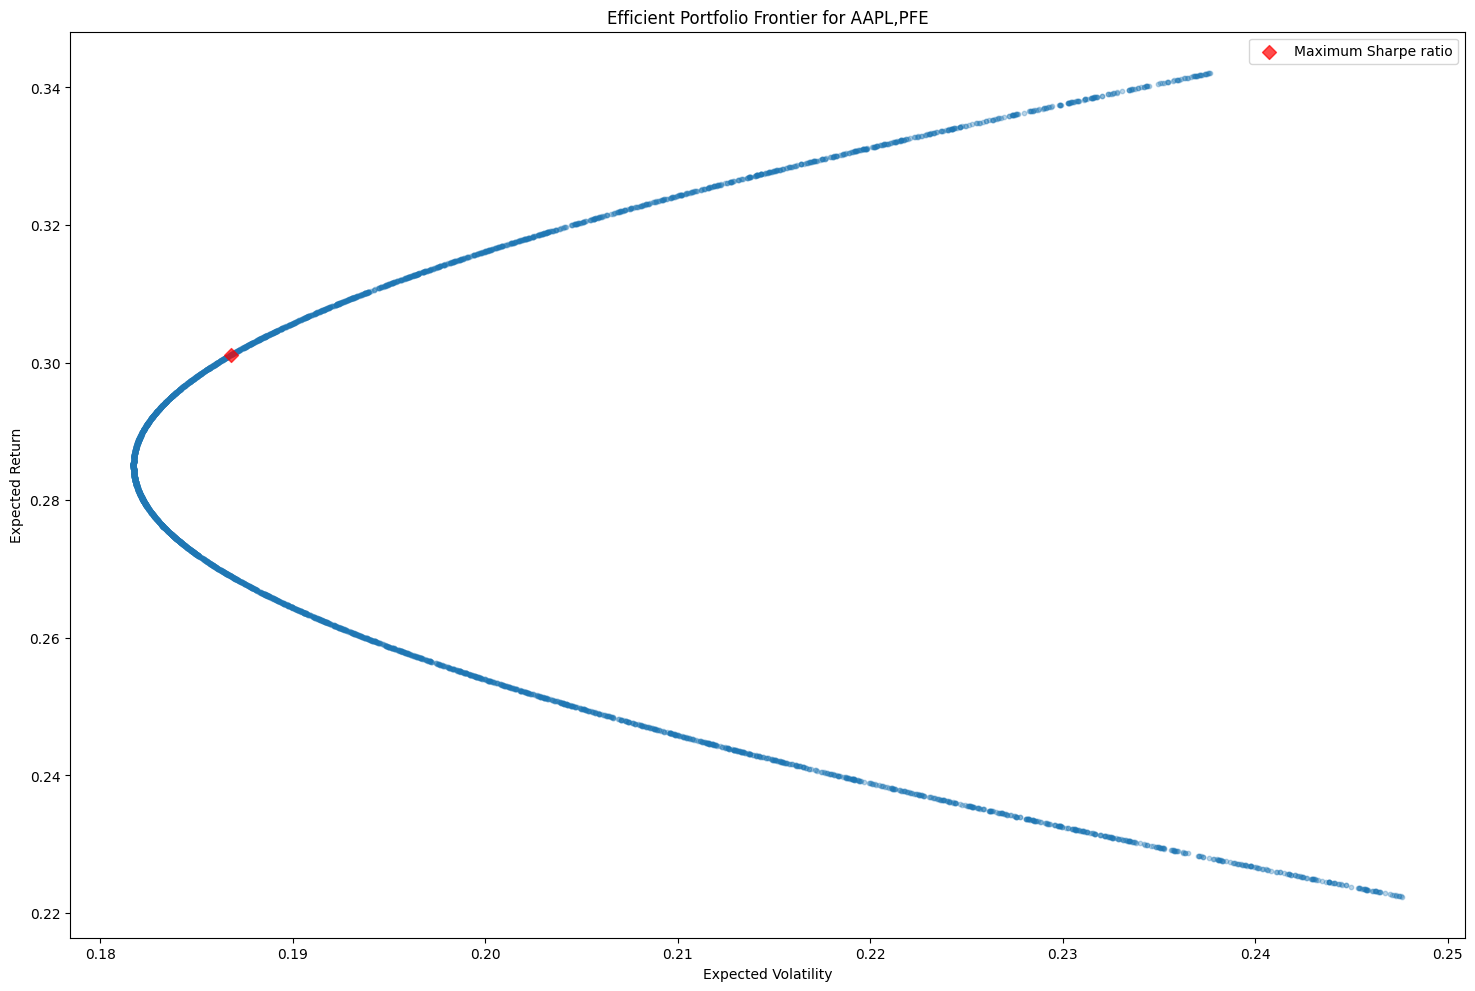

In [164]:
plot_efficient_frontier(p1_returns,p1_volatilities,p1_sharpe_r,tickers = ["AAPL","PFE"])

# For  portfolio consisting of ED, XOM, and AWK

In [111]:
p2_returns, p2_volatilities, p2_sharpe_r = efficient_frontier(tickers = ["ED","XOM","AWK"], runs = 5000)

100%|██████████| 5000/5000 [00:06<00:00, 818.14it/s]


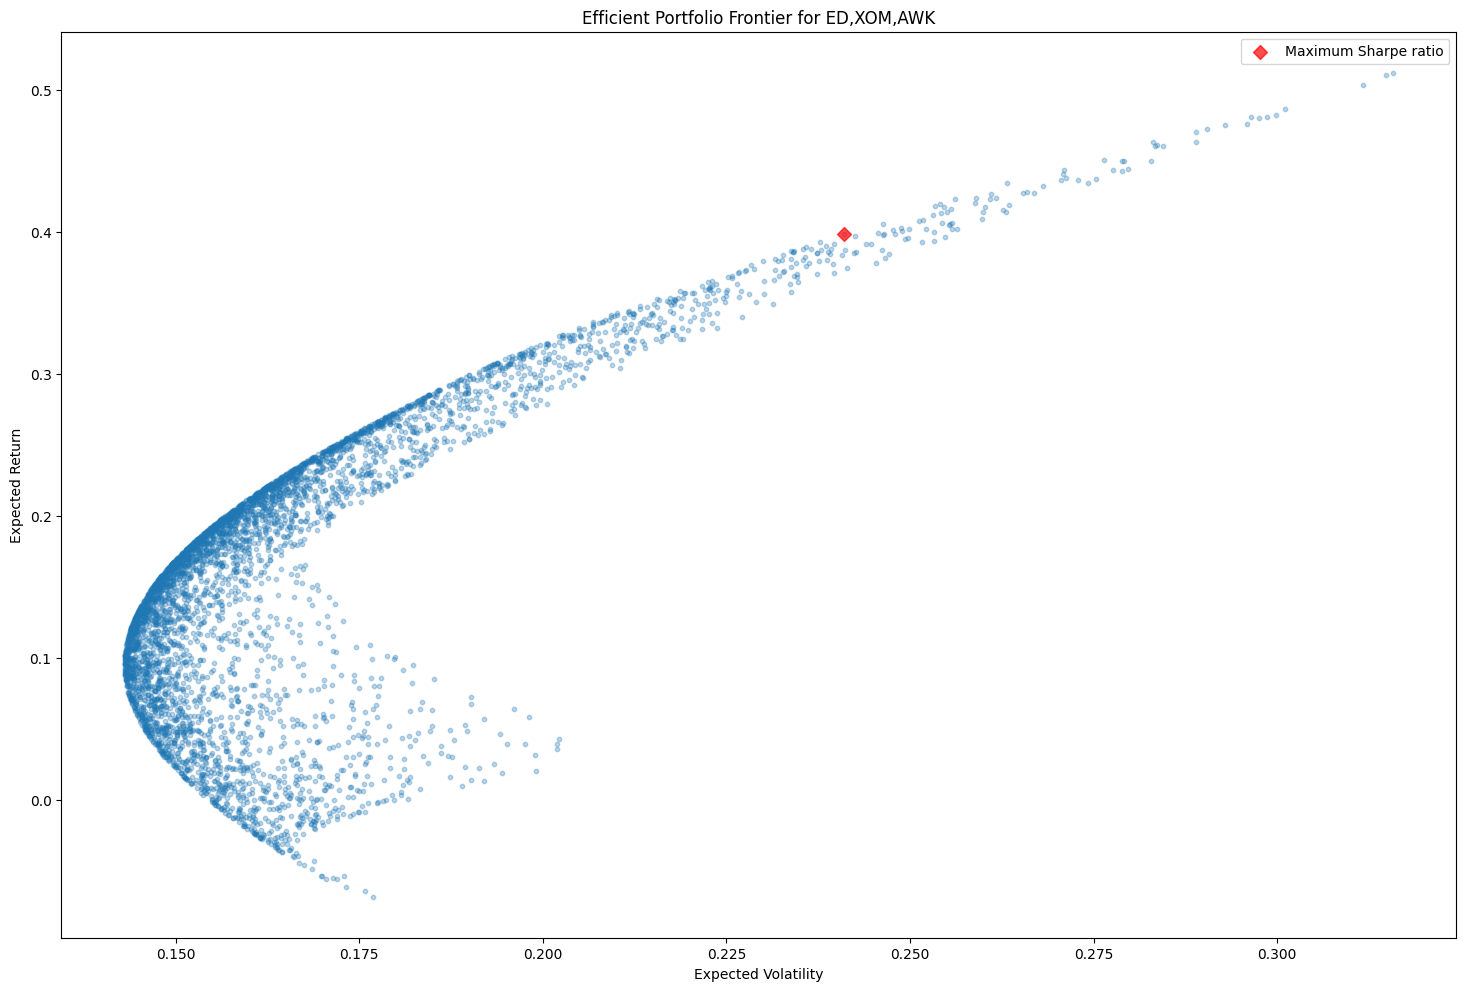

In [165]:
plot_efficient_frontier(p2_returns,p2_volatilities,p2_sharpe_r,tickers = ["ED","XOM","AWK"])

## For  portfolio consisting of AAPL, PFE, ED, XOM, and AWK

In [113]:
p3_returns, p3_volatilities, p3_sharpe_r = efficient_frontier(tickers = ["AAPL","PFE","ED","XOM","AWK"], runs = 5000)

100%|██████████| 5000/5000 [00:06<00:00, 823.14it/s]


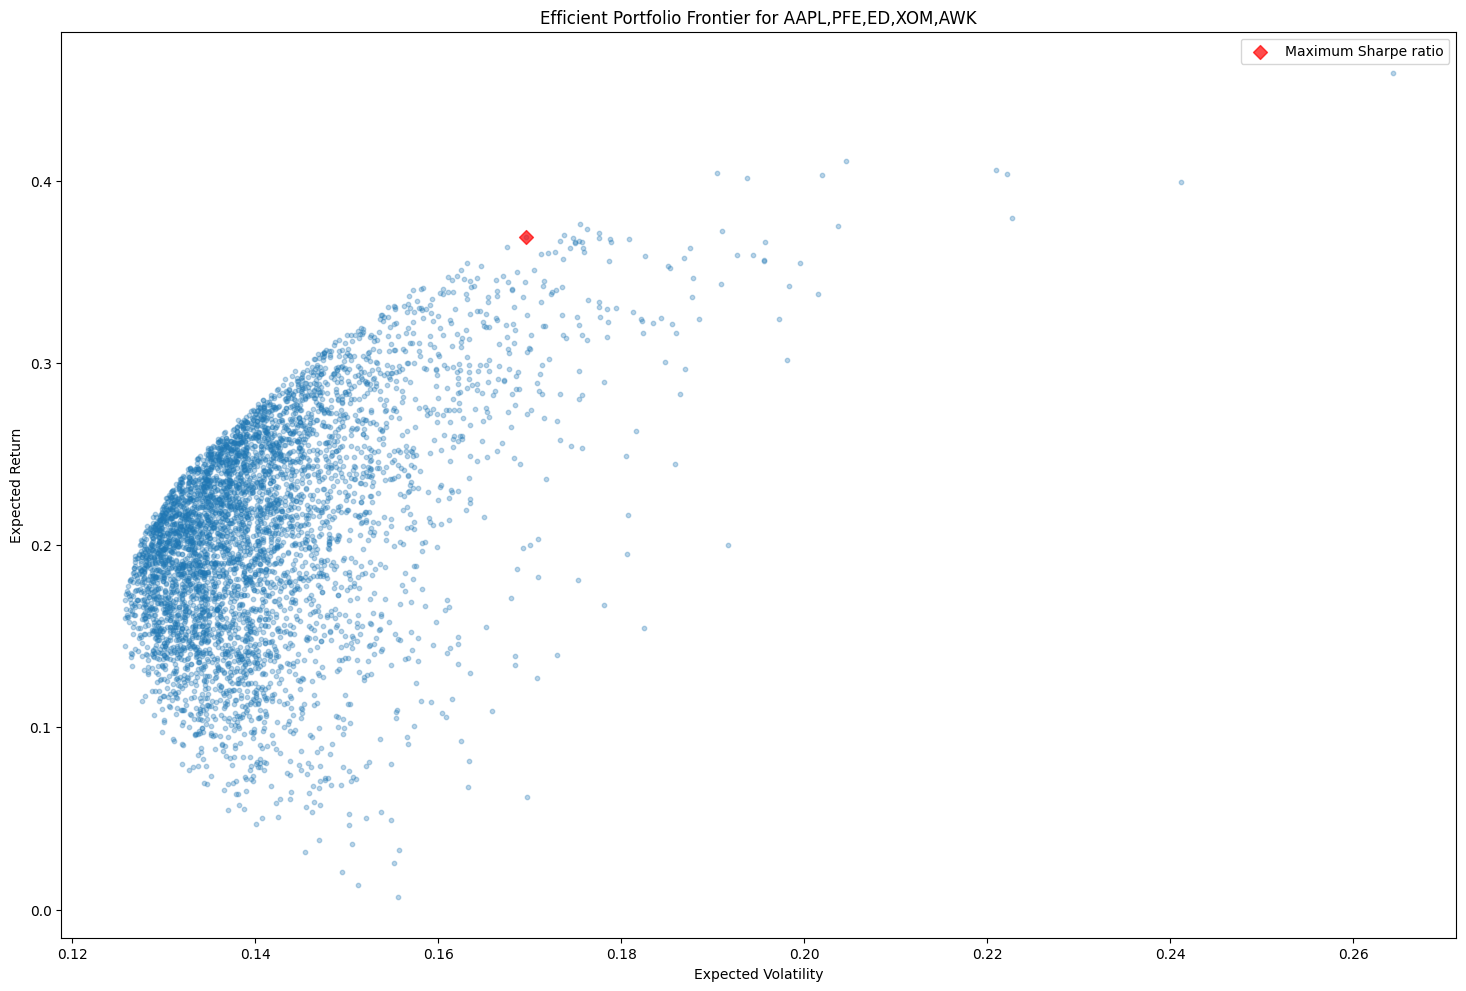

In [166]:
plot_efficient_frontier(p3_returns,p3_volatilities,p3_sharpe_r,tickers = ["AAPL","PFE","ED","XOM","AWK"])

# Plot all three efficient Frontiers on one graph

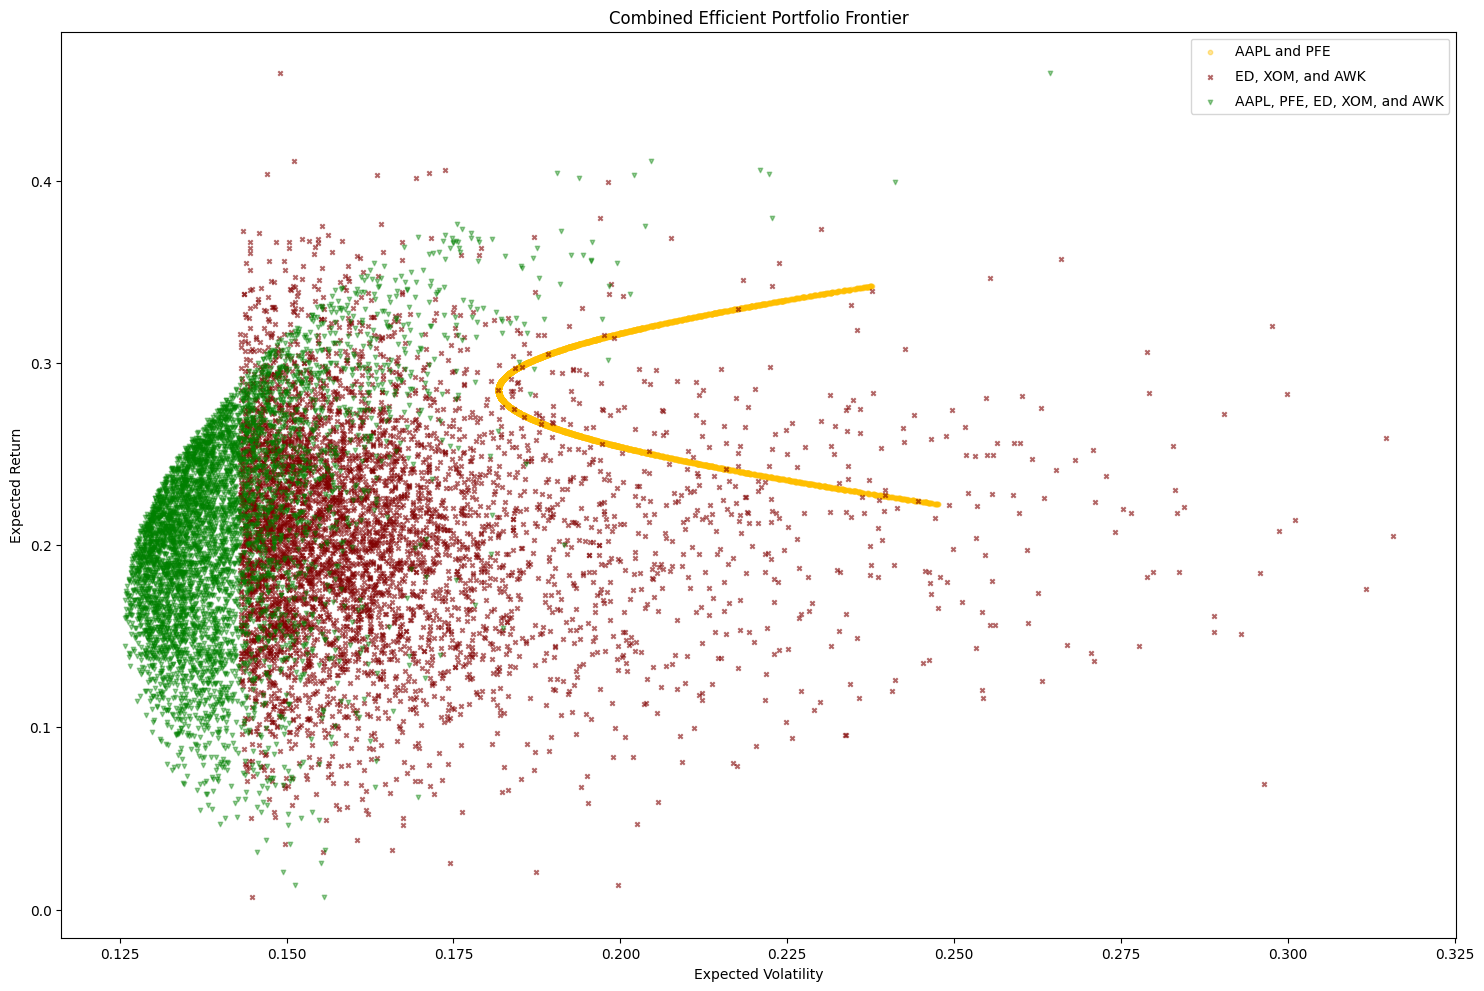

In [155]:
plt.figure(figsize=(18, 12), dpi=100)
plt.scatter(p1_volatilities,p1_returns,marker='o', s=10, alpha=0.4, c = '#FFBF00',label = "AAPL and PFE")
plt.scatter(p2_volatilities,p3_returns,marker='x', s=10, alpha=0.6, c = '#800000',label = "ED, XOM, and AWK")
plt.scatter(p3_volatilities,p3_returns,marker='v', s=10, alpha=0.4, c = 'g',label = "AAPL, PFE, ED, XOM, and AWK")


plt.title(f"Combined Efficient Portfolio Frontier")
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.legend(labelspacing=0.8)
plt.savefig('./combined_portfolio.png', bbox_inches='tight')
plt.show()